# Exam 2
## Author: Diego Cardenas 
### Special Thanks: Colton, Emily, Elias, Ashley, Nathan, Lily

## Import packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the data.
file_name = 'flights'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF = pd.read_csv(file_location)
show(DF)

### Preliminaries

In [9]:
DF.shape

(336776, 19)

There are 336,776 different observations and there are 19 different variables in the flights CSV. <br>
We can see that some of the flights later in submission, do not have much information of arrivale times and departure times<br>

In [10]:
DF.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance          float64
hour              float64
minute            float64
time_hour          object
dtype: object

**year** Numerical since it is a year of numerical numbers<br>
**month** Same as year<br>
**day** same as month<br>
**dep_time** Numerical as it is the time numerical data<br>
**sched_dep_time** Numerical as it is the time numerical data<br>
**arr_time** Numerical as it is the time numerical data<br>
**sched_arr_time** Numerical as it is the time numerical data<br>
**carrier** Categorical data since it is grouping of different carriers<br>
**flight** Categorical data each flight is categorized into their own flight number<br>
**tailnum** Categorical since we have different planes with different tail numbers <br>
**origin** Categorical since it is the origin of where the plane departed from<br>
**dest** Categorical since it is teh destination the plane will land <br>
**air_time** Numerical since it shows the amount of time the plane was on the plane<br>
**distance** Numerical data because of the distance is continuous<br>
**hour** Numerical since it is a discrete data<br>
**minute** Numerical since it is a discrete data<br>
**time_hour** Numerical since it is a discrete data<br>

# Question 1

In [14]:
destination_DF = DF['dest'].value_counts()
show(destination_DF.head(10))

# Question 2

In [67]:
file_name = 'airlines'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
airlines_DF = pd.read_csv(file_location)
airline_Merge = pd.merge( DF, airlines_DF, on='carrier', how='outer') 
show(airline_Merge)

In [51]:
airDepart_DF = airline_Merge['origin'] == 'NYC'
show(airline_Merge['name'].value_counts())

# Question 3

In [63]:
delay_DF = airline_Merge.dropna()
delay_DF.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [88]:
delay = delay_DF.groupby(by=['name'])['arr_delay'].describe()
show(delay)

**A** We can see that the highest mean of arr_delay is Frontier Airlines Inc. and which means that on average if you were to be on a Frontier Airlines flight then you will be about arrive about 22 minutes from your orginal arrival time.<br>
**B** The lowest mean of arr_delay is from Alaska Airlines Inc and you will be about ~10 min early from your arrival time.

# Question 4

In [126]:
interval_DF = DF
interval_DF = DF[DF['dep_time'].notna() & DF['dep_delay'].notna()]
interval_DF['dep_time'] = interval_DF['dep_time'].astype(int)

def groupTime(dep_time):
    if 0 <= dep_time <= 600:
        return '12:00am-6am'
    elif 601 <= dep_time <= 1200:
        return '06:01am-12:00pm'
    elif 1201 <= dep_time <= 1800:
        return '12:01pm-18:00pm'
    elif 1801 <= dep_time <= 2359:
        return '18:00pm-11:59pm'
    else:
        return 'NA'

interval_DF['departure_interval'] = DF['dep_time'].apply(groupTime)
interval_DF['isDelayed'] = DF['dep_delay'] > 0

interval_DF['prob_delay'] = (interval_DF.groupby('departure_interval')['dep_delay'].count()) / (interval_DF.groupby('departure_interval')['isDelayed'].sum())
show(interval_DF)

# Question 5

In [147]:
file_name = 'planes'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
planesDF = pd.read_csv(file_location)
planeMerge = pd.merge( DF, planesDF, on='tailnum', how='inner') 
show(planeMerge)

In [159]:
flightLengthDF = planeMerge
myColumns = ['air_time','dest','seats']
show(flightLengthDF[myColumns].dropna().max())


# Question 6

In [166]:
file_name = 'airports'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
airportsDF = pd.read_csv(file_location)
print(airportsDF.columns)
airportsDF['lat'].max()

Index(['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone'], dtype='object')


72.270833

In [174]:
contigousUS_mask_lat = (airportsDF['lat'] < 49.5) & (airportsDF['lat'] > 25)
contig_DF = airportsDF[contigousUS_mask_lat]
contigousUS_mask_lon = (airportsDF['lon'] > -124.5) & (airportsDF['lon'] < -69.5)
contig_DF = airportsDF[contigousUS_mask_lon]
show(contig_DF)
#Used http://www.cohp.org/extremes/extreme_points.html#:~:text=view%20trip%20reports%20*%20Northernmost%20-%20Northwest,Cape%20Sable%2C%20Florida%20(25.11567°%20N%2C%2081.08579°%20W)&text=*%20Easternmost%20-%20West%20Quoddy%20Head%2C%20Maine%20(44.81335°%20N%2C%2066.94975°%20W)&text=*%20Westernmost%20-%20Cape%20Alava%2C%20Washington%20(48.16974°%20N%2C%20124.73004°%20W)
#for getting the longitudes and latitudes

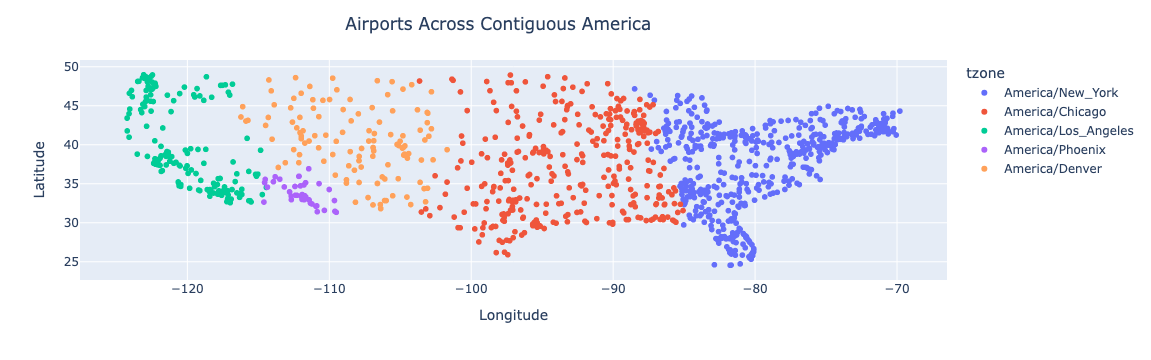

In [191]:
fig = px.scatter(contig_DF,
                    x='lon',
                    y = 'lat',
                color='tzone')
fig.update_layout(title = "Airports Across Contiguous America",
                  title_x=.3,
                  yaxis_title='Latitude',
                  xaxis_title='Longitude')
fig.show()

### We see that the closer we get to the east coast then we see a higher amount of airports. This makes sense as most planes that leave the country to another will take advantage of faster and efficient from flying west to eat especially since there is Europe across the ocean where people might go from eastern airports in the US

# Question 7

In [247]:
file_name = 'flights'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF = pd.read_csv(file_location)
flights = DF

flights['arrival'] = DF['arr_delay'].apply(lambda x: 'ontime' if x <= 0 else 'delayed').sort_values(ascending=True)
december_flights_mask = (flights['month'] == 12) & (flights['dest'].isin(['PHL','RDU']))
decFlights = flights[december_flights_mask]

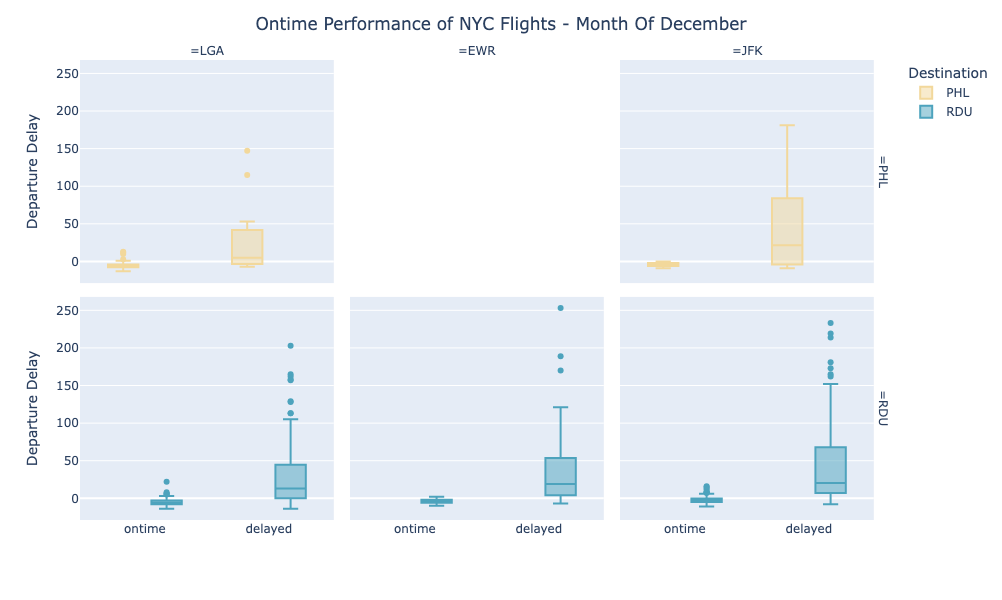

In [258]:
fig = px.box(decFlights, x = 'arrival', 
             y ='dep_delay',
             color = 'dest',
            facet_row = 'dest',
            facet_col = 'origin',
            facet_col_wrap=1,
            category_orders={'arrival': ['ontime','delayed']},
            labels={'dep_delay': 'Departure Delay', 'arrival': '', 'dest': '', '=PHL':'', 'origin': ''},
            color_discrete_map={'PHL': '#f2d89b', 'RDU': '#4da3bd'})

fig.update_layout(
    title='Ontime Performance of NYC Flights - Month Of December',
    showlegend=True,
    legend_title_text='Destination',
    title_x=0.5,
    boxmode='group',
    height=600,
    width=1000
)
fig.show()

# Question 8

### Are large flights or small flights more likely to be late?

In [284]:
file_name = 'planes'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
planesDF = pd.read_csv(file_location)
myCol = ['arr_delay', 'seats']
planeMerge = pd.merge( DF, planesDF, on='tailnum', how='inner') 

arr_delay_mask = planeMerge['arr_delay'] > 0
not_delay_mask = planeMerge['arr_delay'] <= 0

planeOntime = planeMerge[not_delay_mask]
planeDelay = planeMerge[arr_delay_mask]

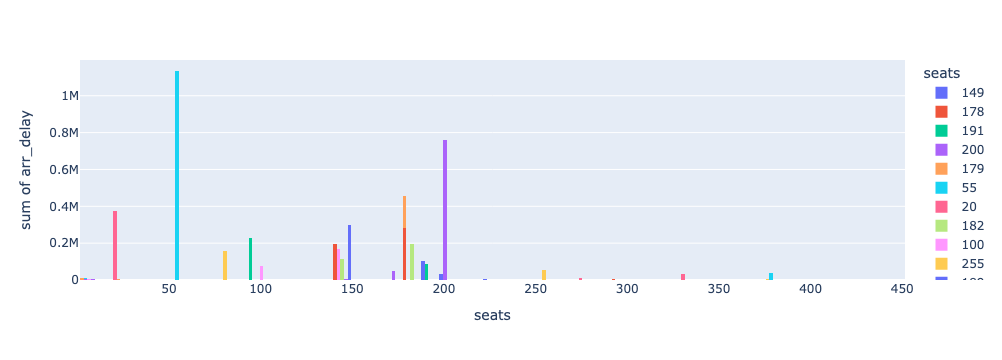

In [286]:
fig = px.histogram(planeDelay,
                 x='seats',
                 y='arr_delay',
                 color='seats')
fig.show()

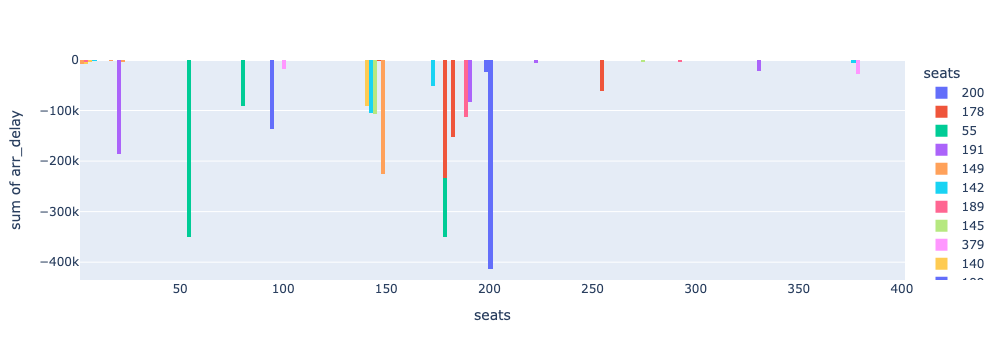

In [272]:
fig = px.histogram(planeOntime,
                 x='seats',
                 y='arr_delay',
                 color='seats')
fig.show()

### We can  see that the more seats a plane has then it will be more likely to be on time from the scheduled arrival. Planes that are typically delayed are from 50-200 but we see a similar graph to those arriving early. So in this case, the size of a plane does not say whether you are going to be arriving late or not.